# Calculate the porphyrin dimensions

In [1]:
from math import cos, radians

def average(num_1, num_2 = None):
    if type(num_1) is list:
        return sum(num_1) / len(num_1)
    else:
        if num_2 is not None:
            numbers = [num_1, num_2]
            average = sum(numbers) / len(numbers)
            return average
        else:
            return num_1

# chemical dimensions in Angstroms (as the averages from https://en.wikipedia.org/wiki/Bond_length) and degrees
chemical_dimensions = {
    'bond':{
        'c-c':average(1.2,1.54),
        'c-h':average(1.06,1.12),
        'c-n':average(1.47,2.1),
        'c-f':average(1.34),
        'n=n':average(1.23) # https://doi.org/10.1016/B978-0-08-101033-4.00003-6
    },
    'angle':{
        'sp3':109.5,
        'sp2':120
    }
}

# abbreviate dimensions
cc_bond = chemical_dimensions['bond']['c-c']
cn_bond = chemical_dimensions['bond']['c-n']
mostly_forward_sp2 = cos(radians(chemical_dimensions['angle']['sp2']-90))
less_forward_sp2 = cos(radians(180-chemical_dimensions['angle']['sp2']))

# calculate the total molecular length & width
center_porphyrin_length = (cc_bond*(3*mostly_forward_sp2 + less_forward_sp2))
sp2_extension = (cc_bond * (2 + less_forward_sp2) + cn_bond * (1 + less_forward_sp2))
total_length = sp2_extension + center_porphyrin_length
print(total_length, 'Angstroms')

10.346864409554044 Angstroms


# Define and execute the solution simulation

The photosensitizer dimensions as a disc = 1.0346864409554045e-09 m x 1.0346864409554045e-09 m x 1.5e-10 m.
Photosensitizer volume = 1.3E-28 m³
The volume proportion of 7.4E15 photosensitizers = (9.3E-13 m³ of photosensitizer)/(2.4E-6 m³ of solution) = 3.8E-7
('photons per timestep: ', 2.6204874386697897e-06)
('molecular oxygen molecules: ', '2.8E-4')
('effective excitation watts: ', '4.3E-3')
// Created by libAntimony v2.12.0.3
model *pdipy_oxidation()

  // Compartments and Species:
  species ps, e_ps, b_ps, mo, so, fa, o_fa;

  // Assignment Rules:
  oxidation := o_fa/(o_fa + fa);

  // Reactions:
  _J0: ps -> e_ps; 20000000000000*8.13949980298628e-5*0.6*ps - 121212121.212121*e_ps;
  _J1: ps => b_ps; 6.96e-10*ps;
  _J2: e_ps + mo => so + ps; 0.48*50000000*e_ps*mo;
  _J3: so => mo; 16666.6666666667*so;
  _J4: so + fa => o_fa + mo; 411.318998088254*so*fa;

  // Species initializations:
  ps = 5.52017182391646e-07;
  e_ps = 4.44796618091634e-06;
  b_ps = 1.65976386394543e-11;
  mo = 0.

,[ps],[e_ps],[b_ps],[mo],[so],[fa],[ofa]
Time (s),,,,,,,
0.000000,5.000000e-06,0.000000,0.000000e+00,0.000281,0.000000,6.902976e-03,0.000000
180.753138,5.520190e-07,0.000004,6.944630e-14,0.000279,0.000002,6.042939e-03,0.000860
361.506276,5.520190e-07,0.000004,1.388926e-13,0.000279,0.000002,5.290034e-03,0.001613
542.259414,5.520190e-07,0.000004,2.083389e-13,0.000279,0.000002,4.630925e-03,0.002272
723.012552,5.520190e-07,0.000004,2.777852e-13,0.000279,0.000002,4.053927e-03,0.002849
...,...,...,...,...,...,...,...
42476.987448,5.520172e-07,0.000004,1.631985e-11,0.000279,0.000002,-2.825872e-12,0.006903
42657.740586,5.520172e-07,0.000004,1.638930e-11,0.000279,0.000002,-2.781873e-12,0.006903
42838.493724,5.520172e-07,0.000004,1.645875e-11,0.000279,0.000002,-2.715543e-12,0.006903


refinement loop:  0
refinement loop:  614
refinement loop:  634
refinement loop:  648
refinement loop:  665
The oxidation data was distilled into inactivation data in 665 loops


C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\core.py:473: RuntimeWarning:

invalid value encountered in log10

C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:




,parameter,value
0,simulation_path,"C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\examples\Beirao_et_al\Beirao_et_al, 5 uM solution"
1,singlet_oxygen_diffusion_distance (m),8.0000E-8
2,root_path,C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy
3,total_time (s),4.3200E4
4,timestep (s),1.8000E2
5,solution_depth (m),1.2670E-2
6,solution_area (m^2),1.9300E-4
7,solution_volume (m^3),2.4453E-6
8,bacterial_specie,S_aureus
9,photosensitizer_selection,"5,10,15,20-tetrakis(1-methylpyridinium-4-yl)porphyrin tetra-iodide"


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:




,variable,value
0,simulation_path,"C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\examples\Beirao_et_al\Beirao_et_al, 5 uM solution"
1,fa_g/L_conc,8.4772E-1
2,fa_molar,6.9030E-3
3,photosensitizer_molar,5.0000E-6
4,photosensitizers,7.3630E15
5,molecular_volume (m^3),1.2612E-28
6,volume_proportion,3.7977E-7
7,photon_moles_per_timestep,2.6205E-6
8,dissolved_mo_molar,2.8126E-4
9,e_ps_decay_time (s),8.2500E-9


,oxidation,inactivation,log-oxidation,log-inactivation
time (hr),,,,
0.050209,0.124589,0.252856,0.057788,0.126596
0.100418,0.233659,0.799619,0.115578,0.698144
0.150628,0.329141,0.960443,0.173369,1.402780
0.200837,0.412728,0.988929,0.231160,1.955811
0.251046,0.485901,0.995952,0.288953,2.392781
...,...,...,...,...
11.799163,1.000000,1.000000,NaN,8.884521
11.849372,1.000000,1.000000,NaN,8.885169
11.899582,1.000000,1.000000,NaN,8.885803


--> ERROR: The inquired reduction is never reached.
--> ERROR: The value was never observed in the simulation predictions.





The photosensitizer dimensions as a disc = 1.0346864409554045e-09 m x 1.0346864409554045e-09 m x 1.5e-10 m.
Photosensitizer volume = 1.3E-28 m³
The volume proportion of 1.5E16 photosensitizers = (1.9E-12 m³ of photosensitizer)/(2.4E-6 m³ of solution) = 7.6E-7
('photons per timestep: ', 2.6204874386697897e-06)
('molecular oxygen molecules: ', '2.8E-4')
('effective excitation watts: ', '4.3E-3')
// Created by libAntimony v2.12.0.3
model *pdipy_oxidation()

  // Compartments and Species:
  species ps, e_ps, b_ps, mo, so, fa, o_fa;

  // Assignment Rules:
  oxidation := o_fa/(o_fa + fa);

  // Reactions:
  _J0: ps -> e_ps; 20000000000000*8.13949980298628e-5*0.6*ps - 121212121.212121*e_ps;
  _J1: ps => b_ps; 6.96e-10*ps;
  _J2: e_ps + mo => so + ps; 0.48*50000000*e_ps*mo;
  _J3: so => mo; 16666.6666666667*so;
  _J4: so + fa => o_fa + mo; 411.318998088254*so*fa;

  

,[ps],[e_ps],[b_ps],[mo],[so],[fa],[ofa]
Time (s),,,,,,,
0.000000,0.000010,0.000000,0.000000e+00,0.000281,0.000000,6.902976e-03,0.000000
180.753138,0.000001,0.000009,1.388926e-13,0.000278,0.000004,5.298945e-03,0.001604
361.506276,0.000001,0.000009,2.777851e-13,0.000278,0.000004,4.067589e-03,0.002835
542.259414,0.000001,0.000009,4.166777e-13,0.000278,0.000004,3.122346e-03,0.003781
723.012552,0.000001,0.000009,5.555702e-13,0.000278,0.000004,2.396755e-03,0.004506
...,...,...,...,...,...,...,...
42476.987448,0.000001,0.000009,3.263970e-11,0.000278,0.000004,8.006874e-15,0.006903
42657.740586,0.000001,0.000009,3.277859e-11,0.000278,0.000004,4.758991e-15,0.006903
42838.493724,0.000001,0.000009,3.291748e-11,0.000278,0.000004,7.410324e-16,0.006903


C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\core.py:473: RuntimeWarning:

invalid value encountered in log10



refinement loop:  0
refinement loop:  862
refinement loop:  876
refinement loop:  893
refinement loop:  912
The oxidation data was distilled into inactivation data in 912 loops


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:




,parameter,value
0,simulation_path,"C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\examples\Beirao_et_al\Beirao_et_al, 10 uM solution"
1,singlet_oxygen_diffusion_distance (m),8.0000E-8
2,root_path,C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy
3,total_time (s),4.3200E4
4,timestep (s),1.8000E2
5,solution_depth (m),1.2670E-2
6,solution_area (m^2),1.9300E-4
7,solution_volume (m^3),2.4453E-6
8,bacterial_specie,S_aureus
9,photosensitizer_selection,"5,10,15,20-tetrakis(1-methylpyridinium-4-yl)porphyrin tetra-iodide"


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:




,variable,value
0,simulation_path,"C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\examples\Beirao_et_al\Beirao_et_al, 10 uM solution"
1,fa_g/L_conc,8.4772E-1
2,fa_molar,6.9030E-3
3,photosensitizer_molar,1.0000E-5
4,photosensitizers,1.4726E16
5,molecular_volume (m^3),1.2612E-28
6,volume_proportion,7.5954E-7
7,photon_moles_per_timestep,2.6205E-6
8,dissolved_mo_molar,2.8126E-4
9,e_ps_decay_time (s),8.2500E-9


,oxidation,inactivation,log-oxidation,log-inactivation
time (hr),,,,
0.050209,0.232368,0.759897,0.114847,0.619602
0.100418,0.410748,0.988762,0.229699,1.949293
0.150628,0.547681,0.998449,0.344555,2.809334
0.200837,0.652794,0.999622,0.459413,3.422680
0.251046,0.733481,0.999874,0.574272,3.898787
...,...,...,...,...
11.799163,1.000000,1.000000,11.935598,9.415251
11.849372,1.000000,1.000000,12.161498,9.415269
11.899582,1.000000,1.000000,12.969163,9.415286


--> ERROR: The inquired reduction is never reached.
--> ERROR: The value was never observed in the simulation predictions.





The photosensitizer dimensions as a disc = 1.0346864409554045e-09 m x 1.0346864409554045e-09 m x 1.5e-10 m.
Photosensitizer volume = 1.3E-28 m³
The volume proportion of 2.9E16 photosensitizers = (3.7E-12 m³ of photosensitizer)/(2.4E-6 m³ of solution) = 1.5E-6
('photons per timestep: ', 2.6204874386697897e-06)
('molecular oxygen molecules: ', '2.8E-4')
('effective excitation watts: ', '4.3E-3')
// Created by libAntimony v2.12.0.3
model *pdipy_oxidation()

  // Compartments and Species:
  species ps, e_ps, b_ps, mo, so, fa, o_fa;

  // Assignment Rules:
  oxidation := o_fa/(o_fa + fa);

  // Reactions:
  _J0: ps -> e_ps; 20000000000000*8.13949980298628e-5*0.6*ps - 121212121.212121*e_ps;
  _J1: ps => b_ps; 6.96e-10*ps;
  _J2: e_ps + mo => so + ps; 0.48*50000000*e_ps*mo;
  _J3: so => mo; 16666.6666666667*so;
  _J4: so + fa => o_fa + mo; 411.318998088254*so*fa;

  

,[ps],[e_ps],[b_ps],[mo],[so],[fa],[ofa]
Time (s),,,,,,,
0.000000,0.000020,0.000000,0.000000e+00,0.000281,0.000000,6.902976e-03,0.000000
180.753138,0.000002,0.000018,2.777850e-13,0.000274,0.000007,4.094555e-03,0.002808
361.506276,0.000002,0.000018,5.555699e-13,0.000274,0.000007,2.428634e-03,0.004474
542.259414,0.000002,0.000018,8.333548e-13,0.000274,0.000007,1.440497e-03,0.005462
723.012552,0.000002,0.000018,1.111140e-12,0.000274,0.000007,8.543965e-04,0.006049
...,...,...,...,...,...,...,...
42476.987448,0.000002,0.000018,6.527936e-11,0.000274,0.000007,1.733196e-15,0.006903
42657.740586,0.000002,0.000018,6.555714e-11,0.000274,0.000007,1.623760e-15,0.006903
42838.493724,0.000002,0.000018,6.583493e-11,0.000274,0.000007,1.516618e-15,0.006903


refinement loop:  0
refinement loop:  964
refinement loop:  982
refinement loop:  1001
refinement loop:  1019
The oxidation data was distilled into inactivation data in 1019 loops


C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\core.py:473: RuntimeWarning:

invalid value encountered in log10

C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:




,parameter,value
0,simulation_path,"C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\examples\Beirao_et_al\Beirao_et_al, 20 uM solution"
1,singlet_oxygen_diffusion_distance (m),8.0000E-8
2,root_path,C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy
3,total_time (s),4.3200E4
4,timestep (s),1.8000E2
5,solution_depth (m),1.2670E-2
6,solution_area (m^2),1.9300E-4
7,solution_volume (m^3),2.4453E-6
8,bacterial_specie,S_aureus
9,photosensitizer_selection,"5,10,15,20-tetrakis(1-methylpyridinium-4-yl)porphyrin tetra-iodide"


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:




,variable,value
0,simulation_path,"C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\examples\Beirao_et_al\Beirao_et_al, 20 uM solution"
1,fa_g/L_conc,8.4772E-1
2,fa_molar,6.9030E-3
3,photosensitizer_molar,2.0000E-5
4,photosensitizers,2.9452E16
5,molecular_volume (m^3),1.2612E-28
6,volume_proportion,1.5191E-6
7,photon_moles_per_timestep,2.6205E-6
8,dissolved_mo_molar,2.8126E-4
9,e_ps_decay_time (s),8.2500E-9


,oxidation,inactivation,log-oxidation,log-inactivation
time (hr),,,,
0.050209,0.406842,0.985568,0.226830,1.840659
0.100418,0.648176,0.999708,0.453674,3.535047
0.150628,0.791322,0.999971,0.680524,4.531295
0.200837,0.876228,0.999994,0.907377,5.237889
0.251046,0.926588,0.999998,1.134230,5.784962
...,...,...,...,...
11.799163,1.000000,1.000000,12.600289,8.150860
11.849372,1.000000,1.000000,12.628459,8.150860
11.899582,1.000000,1.000000,12.658144,8.150860


--> ERROR: The inquired reduction is never reached.
--> ERROR: The value was never observed in the simulation predictions.







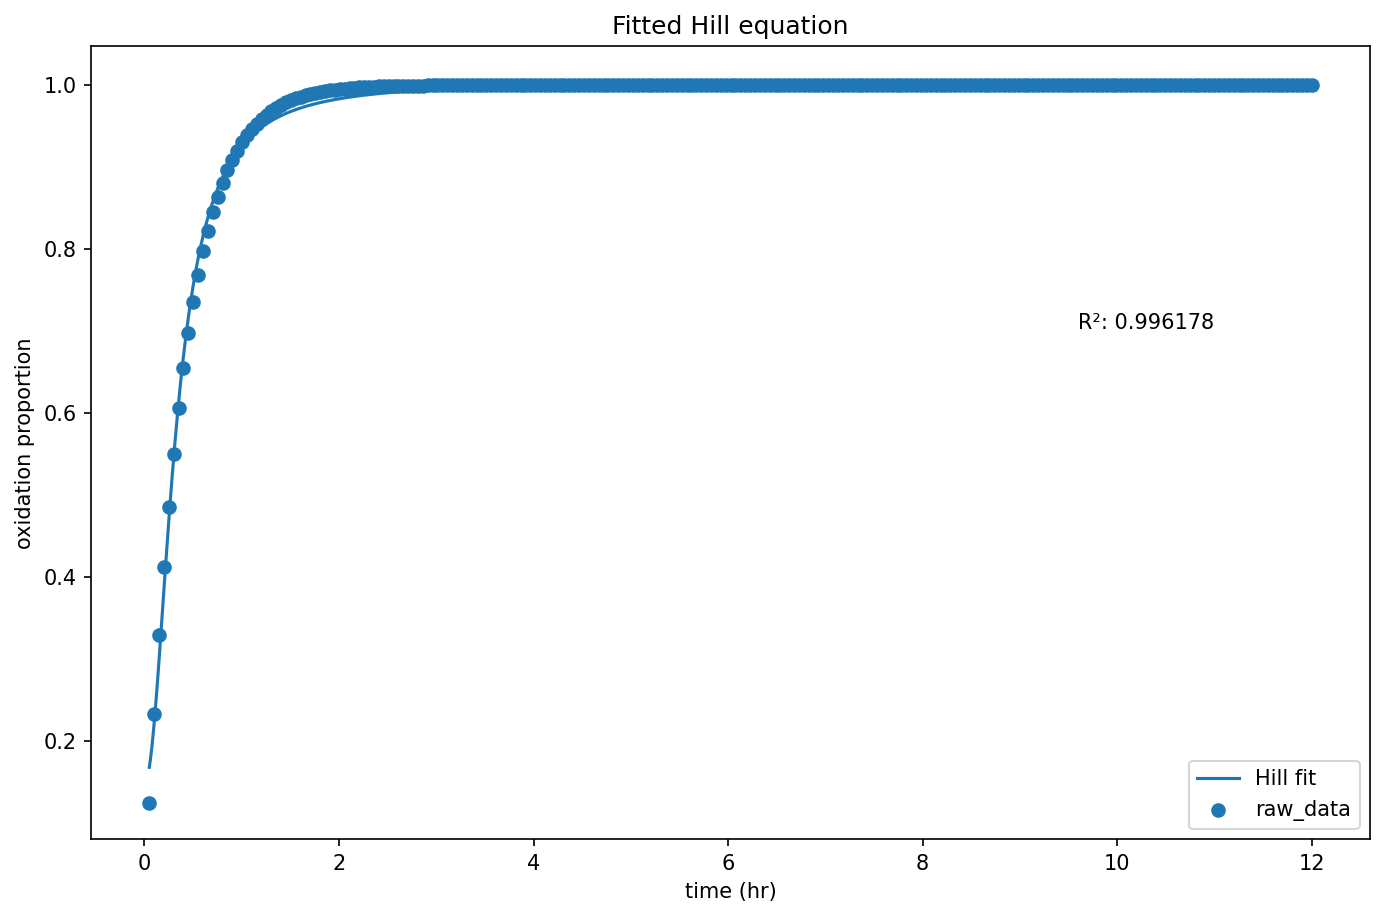

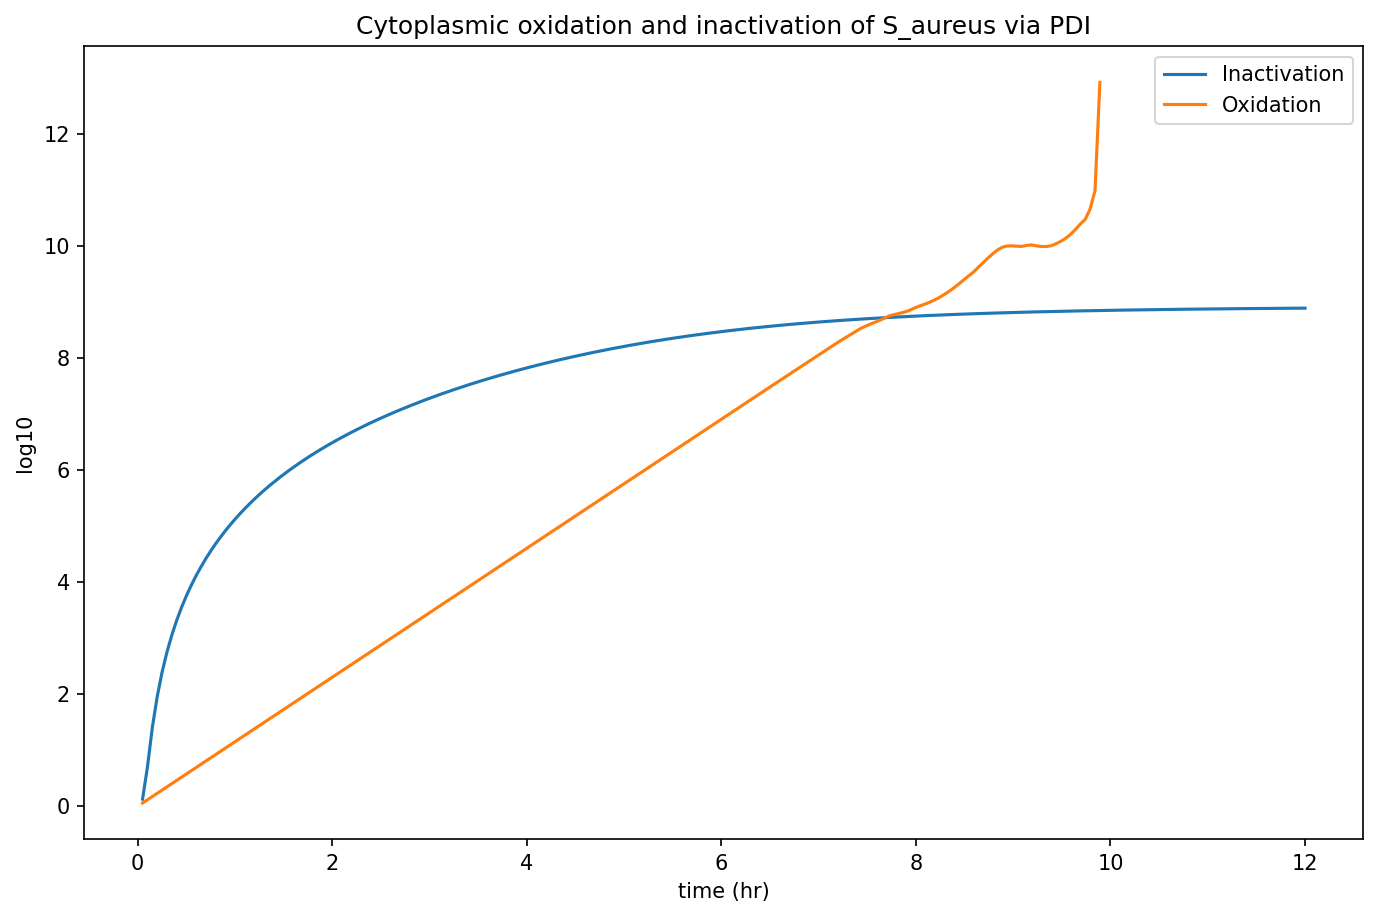

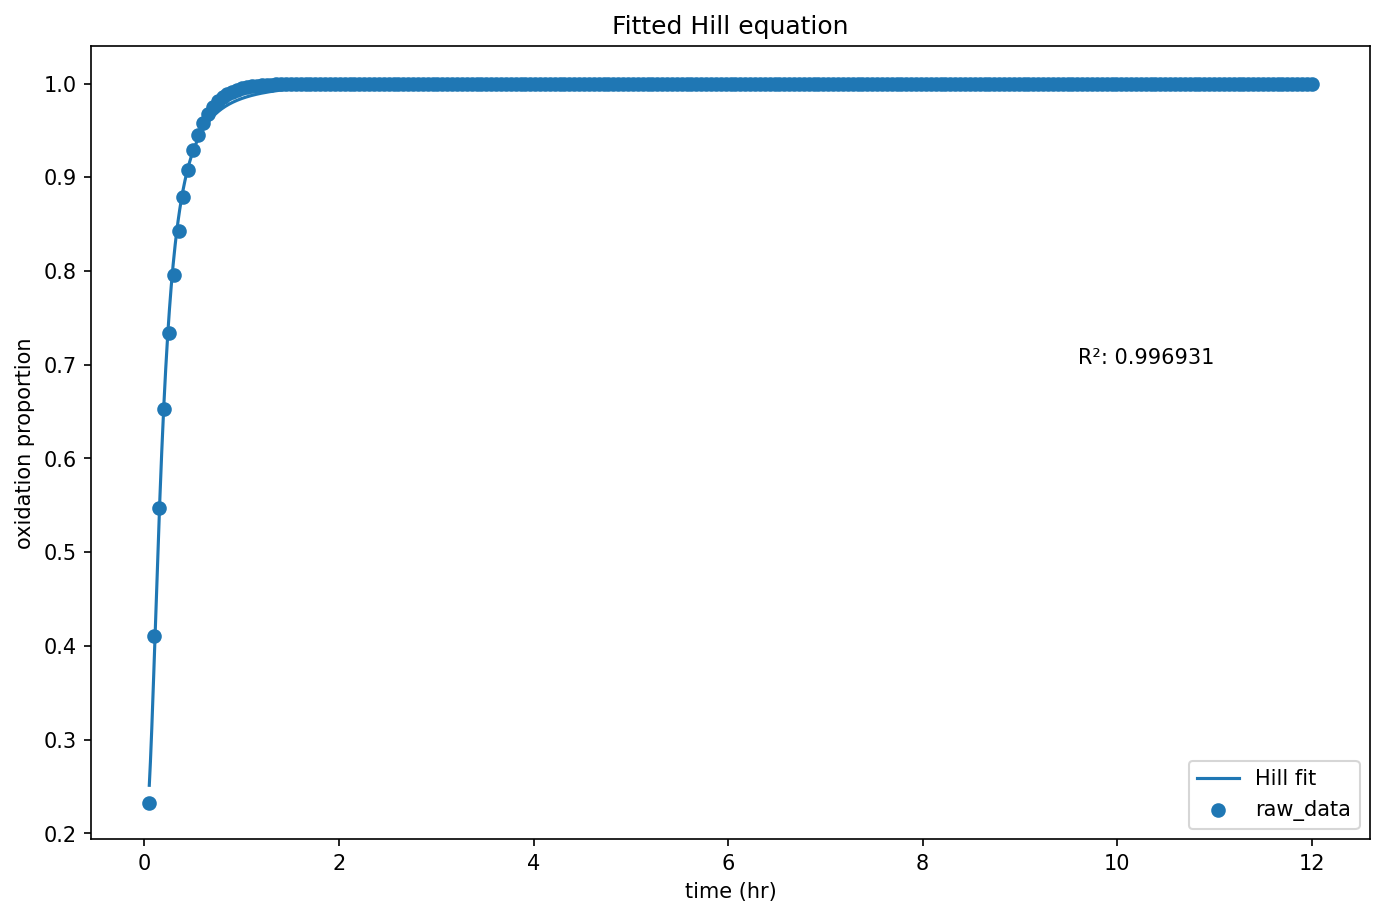

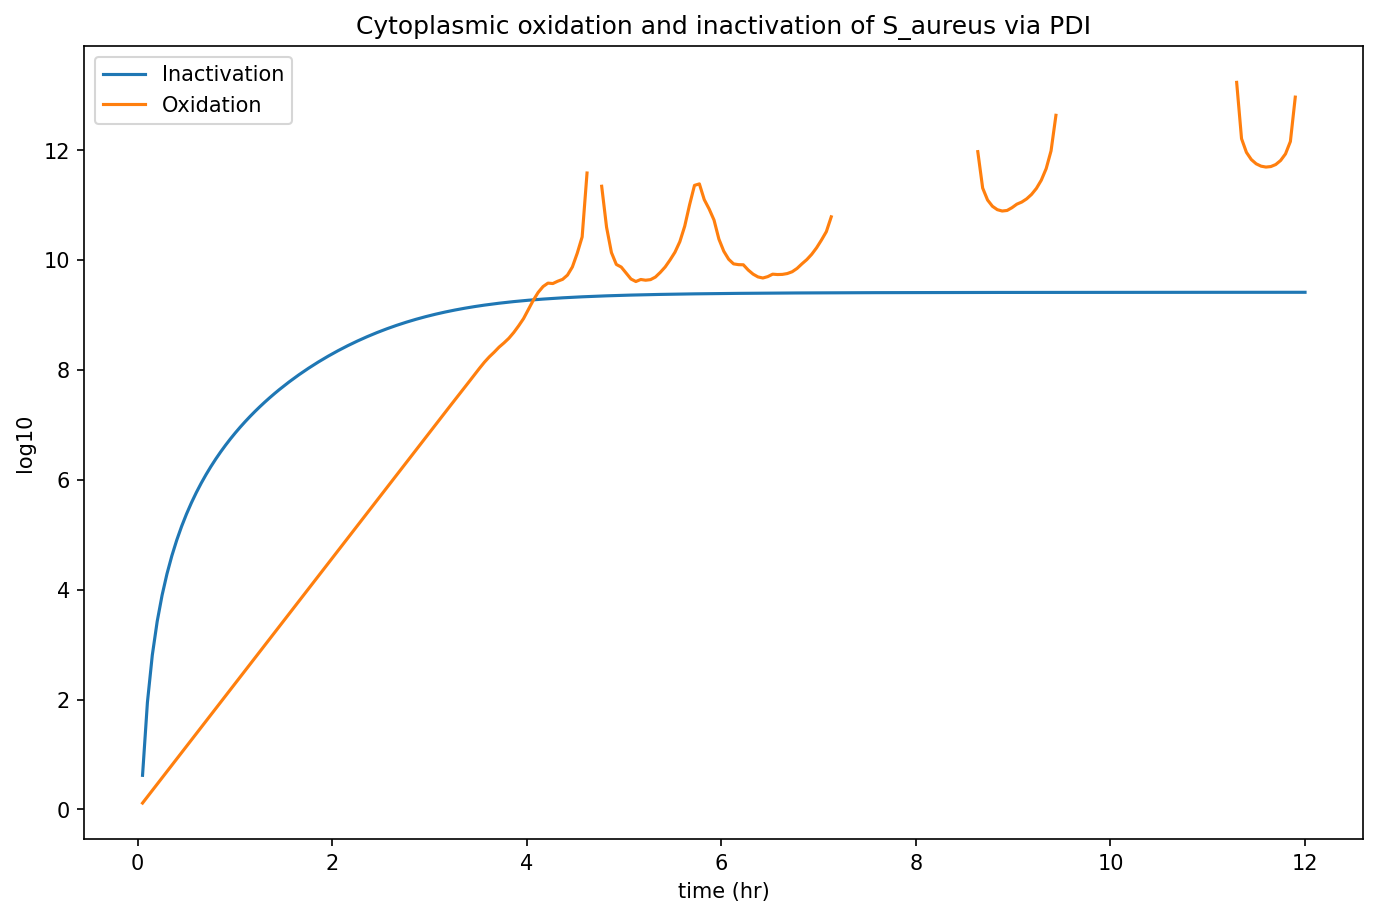

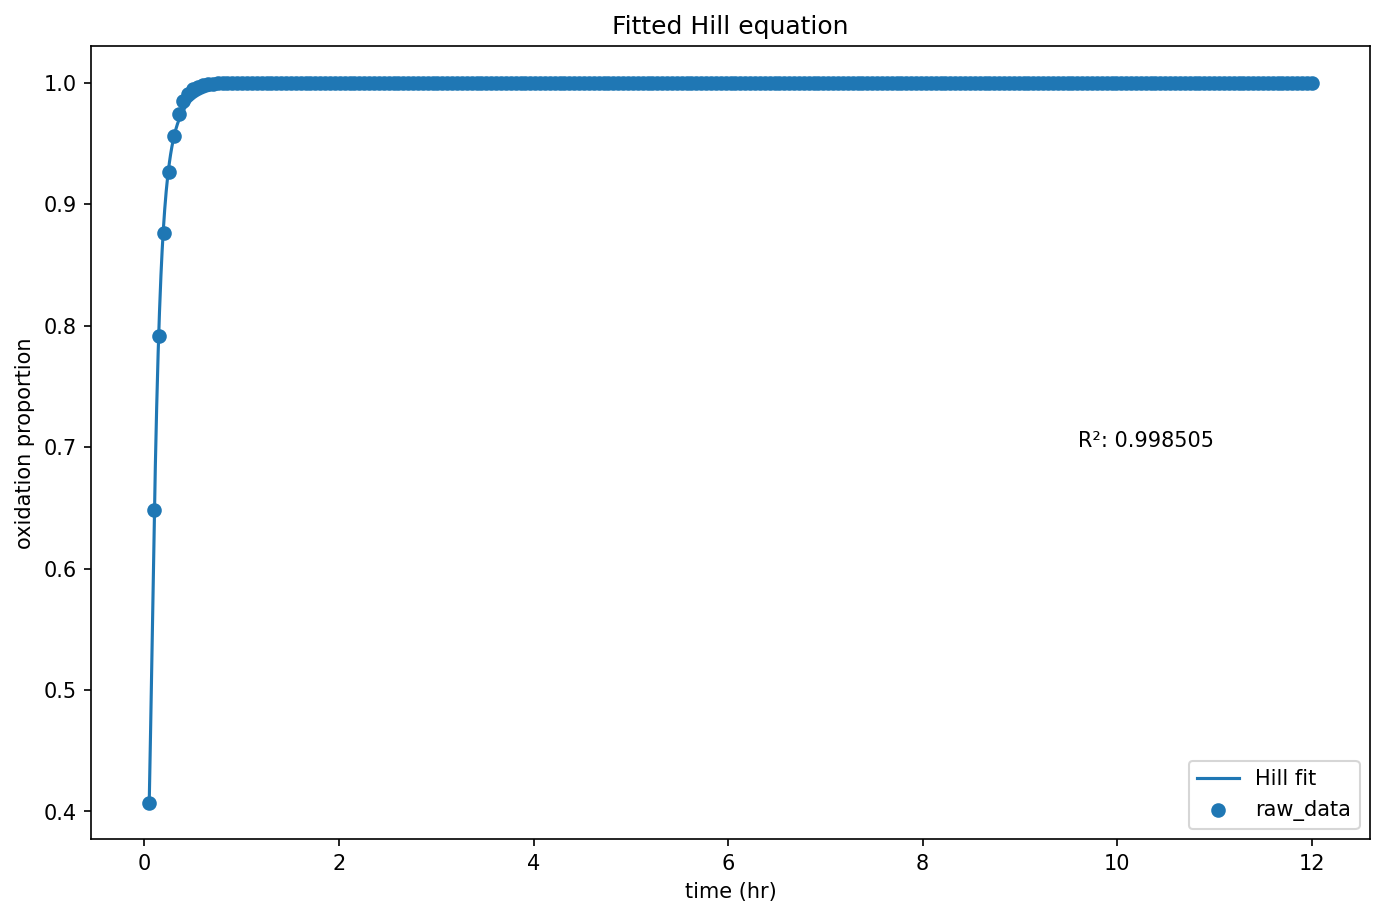

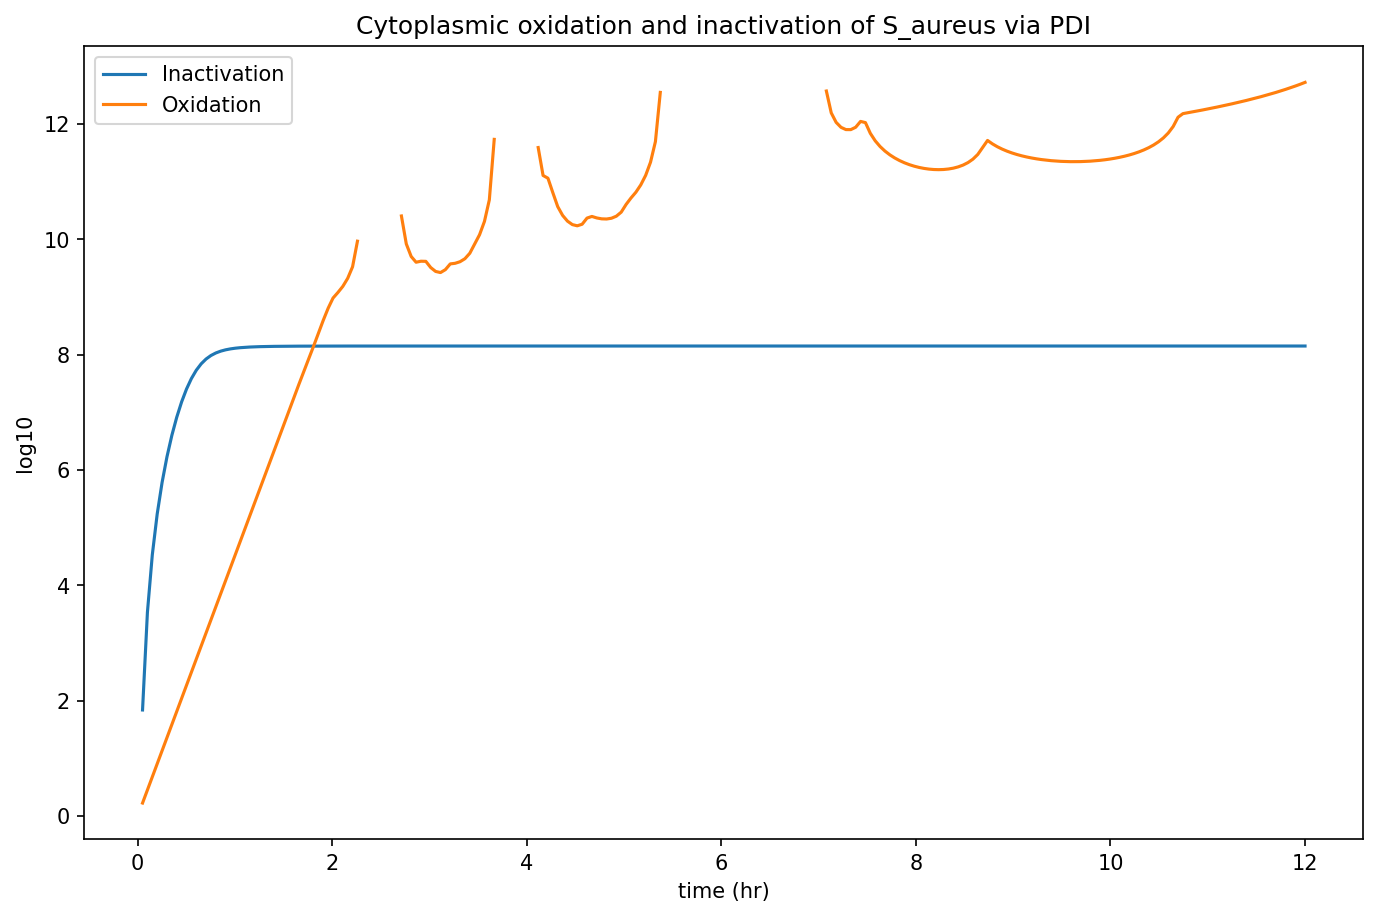

In [2]:
from scipy.constants import micro
from uncertainties import ufloat
%run ../../pdipy/core.py
%matplotlib inline

# define photosensitizer parameters
photosensitizer = {
    'name': '5,10,15,20-tetrakis(1-methylpyridinium-4-yl)porphyrin tetra-iodide',
    'mw': {
        'value':1186.462   # mass with iodides included, sans iodides 678.84,
    },
    'dimensions':{
        'length (A)': total_length,
        'width (A)': total_length,
        'depth (A)': 1.5,
        'shape': 'disc',
    }
}

# define the light parameters
irradiance = 4
light_source = {
    'name': 'OSRAM 2\' 18W/840 lamps',
    "visible_proportion": {
      "value": (700-390)/(700-380),
    }
}


# define general parameters
bacterial_cfu_ml = 1E8
total_time = 720
bacterial_specie = 'S_aureus'
photosensitizer_molars = [5*micro, 10*micro, 20*micro]

# execute the simulation
target_reduction = 7.6
for photosensitizer_molar in photosensitizer_molars:
    export_name = f'Beirao_et_al, {int(photosensitizer_molar/micro)} uM solution'
    
    pdi = PDIBacterialPkg(total_time, verbose = True, jupyter = True)
    pdi.define_bacterium(bacterial_specie, bacterial_cfu_ml)
    pdi.define_photosensitizer(photosensitizer, photosensitizer_molar)
    pdi.define_light(light_source, irradiance)
    pdi.simulate(display_fa_oxidation = True)
    pdi.export(export_name)
    display(pdi.processed_data)

    # affirm the accuracy of the prediction
    value, unit = pdi.data_parsing(target_reduction)    
    if value is not None:
        actual_value = 1
        tolerance = actual_value*0.5
        acceptable_range = [actual_value-tolerance, actual_value+tolerance]
        acceptable_range_float = ufloat(actual_value, tolerance)
        if acceptable_range[0] < value < acceptable_range[1]:
            print(f'The prediction of {value} is within the {acceptable_range_float} tolerance of the actual value.')
        else:
            print(f'--> ERROR: The prediction of {value} is not within the {acceptable_range_float} tolerance of the actual value.')
    else:
        print('--> ERROR: The value was never observed in the simulation predictions.')
    print('\n\n\n\n')

# Define and execute the biofilm simulation

The photosensitizer dimensions as a disc = 1.0346864409554045e-09 m x 1.0346864409554045e-09 m x 1.5e-10 m.
Photosensitizer volume = 1.3E-28 m³
The volume proportion of 7.4E15 photosensitizers = (9.3E-13 m³ of photosensitizer)/(2.4E-6 m³ of solution) = 3.8E-7
('photons per timestep: ', 2.6204874386697897e-06)
('molecular oxygen molecules: ', '2.8E-4')
('effective excitation watts: ', '4.3E-3')
// Created by libAntimony v2.12.0.3
model *pdipy_oxidation()

  // Compartments and Species:
  species ps, e_ps, b_ps, mo, so, fa, o_fa, o_eps;

  // Assignment Rules:
  oxidation := o_fa/(o_fa + fa);

  // Reactions:
  _J0: ps -> e_ps; 20000000000000*8.13949980298628e-5*0.6*ps - 121212121.212121*e_ps;
  _J1: ps => b_ps; 6.96e-10*ps;
  _J2: e_ps + mo => so + ps; 0.48*50000000*e_ps*mo;
  _J3: so => mo; 16666.6666666667*so;
  _J4: so + fa => o_fa + mo; 411.318998088254*so*fa;
  _J5: so => o_eps + mo; 1*so;

  // Species initializations:
  ps = 5.52017182402021e-07;
  e_ps = 4.44796618090596e-06;
  

,[ps],[e_ps],[b_ps],[mo],[so],[fa],[ofa],[oeps]
Time (s),,,,,,,,
0.000000,5.000000e-06,0.000000,0.000000e+00,0.000281,0.000000,6.902976e-03,0.000000,0.000000
180.753138,5.520190e-07,0.000004,6.944630e-14,0.000279,0.000002,6.042987e-03,0.000860,0.000323
361.506276,5.520190e-07,0.000004,1.388926e-13,0.000279,0.000002,5.290118e-03,0.001613,0.000647
542.259414,5.520190e-07,0.000004,2.083389e-13,0.000279,0.000002,4.631035e-03,0.002272,0.000970
723.012552,5.520190e-07,0.000004,2.777852e-13,0.000279,0.000002,4.054056e-03,0.002849,0.001294
...,...,...,...,...,...,...,...,...
42476.987448,5.520172e-07,0.000004,1.631985e-11,0.000279,0.000002,-8.136185e-13,0.006903,0.076030
42657.740586,5.520172e-07,0.000004,1.638930e-11,0.000279,0.000002,-7.638035e-13,0.006903,0.076354
42838.493724,5.520172e-07,0.000004,1.645875e-11,0.000279,0.000002,-6.877057e-13,0.006903,0.076677


refinement loop:  0
refinement loop:  620
refinement loop:  640
refinement loop:  657
refinement loop:  677
The oxidation data was distilled into inactivation data in 677 loops


C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\core.py:473: RuntimeWarning:

invalid value encountered in log10

C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:




,parameter,value
0,simulation_path,"C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\examples\Beirao_et_al\Beirao_et_al, biofilm, 5 uM solution"
1,singlet_oxygen_diffusion_distance (m),8.0000E-8
2,root_path,C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy
3,total_time (s),4.3200E4
4,timestep (s),1.8000E2
5,solution_depth (m),1.2670E-2
6,solution_area (m^2),1.9300E-4
7,solution_volume (m^3),2.4453E-6
8,bacterial_specie,S_aureus
9,photosensitizer_selection,"5,10,15,20-tetrakis(1-methylpyridinium-4-yl)porphyrin tetra-iodide"


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:




,variable,value
0,simulation_path,"C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\examples\Beirao_et_al\Beirao_et_al, biofilm, 5 uM solution"
1,fa_g/L_conc,8.4772E-1
2,fa_molar,6.9030E-3
3,photosensitizer_molar,5.0000E-6
4,photosensitizers,7.3630E15
5,molecular_volume (m^3),1.2612E-28
6,volume_proportion,3.7977E-7
7,photon_moles_per_timestep,2.6205E-6
8,dissolved_mo_molar,2.8126E-4
9,eps_oxidation,1.0000E0


,oxidation,inactivation,log-oxidation,log-inactivation
time (hr),,,,
0.050209,0.124582,0.478363,0.057785,0.282632
0.100418,0.233647,0.737330,0.115571,0.580589
0.150628,0.329125,0.850657,0.173358,0.825814
0.200837,0.412709,0.904895,0.231147,1.021795
0.251046,0.485880,0.934290,0.288936,1.182370
...,...,...,...,...
11.799163,1.000000,0.999998,NaN,5.694885
11.849372,1.000000,0.999998,NaN,5.814460
11.899582,1.000000,0.999999,NaN,5.977625


hours to target: 4.920502092050209
4.920502092050209 hours
The prediction of 4.920502092050209 is within the 6.5+/-3.2 tolerance of the actual value.





The photosensitizer dimensions as a disc = 1.0346864409554045e-09 m x 1.0346864409554045e-09 m x 1.5e-10 m.
Photosensitizer volume = 1.3E-28 m³
The volume proportion of 1.5E16 photosensitizers = (1.9E-12 m³ of photosensitizer)/(2.4E-6 m³ of solution) = 7.6E-7
('photons per timestep: ', 2.6204874386697897e-06)
('molecular oxygen molecules: ', '2.8E-4')
('effective excitation watts: ', '4.3E-3')
// Created by libAntimony v2.12.0.3
model *pdipy_oxidation()

  // Compartments and Species:
  species ps, e_ps, b_ps, mo, so, fa, o_fa, o_eps;

  // Assignment Rules:
  oxidation := o_fa/(o_fa + fa);

  // Reactions:
  _J0: ps -> e_ps; 20000000000000*8.13949980298628e-5*0.6*ps - 121212121.212121*e_ps;
  _J1: ps => b_ps; 6.96e-10*ps;
  _J2: e_ps + mo => so + ps; 0.48*50000000*e_ps*mo;
  _J3: so => mo; 16666.6666666667*so;
  _J4: so + fa => o_fa

,[ps],[e_ps],[b_ps],[mo],[so],[fa],[ofa],[oeps]
Time (s),,,,,,,,
0.000000,0.000010,0.000000,0.000000e+00,0.000281,0.000000,6.902976e-03,0.000000,0.000000
180.753138,0.000001,0.000009,1.388926e-13,0.000278,0.000004,5.299027e-03,0.001604,0.000643
361.506276,0.000001,0.000009,2.777851e-13,0.000278,0.000004,4.067721e-03,0.002835,0.001286
542.259414,0.000001,0.000009,4.166777e-13,0.000278,0.000004,3.122492e-03,0.003780,0.001929
723.012552,0.000001,0.000009,5.555702e-13,0.000278,0.000004,2.396910e-03,0.004506,0.002572
...,...,...,...,...,...,...,...,...
42476.987448,0.000001,0.000009,3.263970e-11,0.000278,0.000004,6.426641e-14,0.006903,0.151099
42657.740586,0.000001,0.000009,3.277859e-11,0.000278,0.000004,4.952148e-14,0.006903,0.151742
42838.493724,0.000001,0.000009,3.291748e-11,0.000278,0.000004,3.248223e-14,0.006903,0.152385


refinement loop:  0
refinement loop:  863
refinement loop:  879
refinement loop:  893
refinement loop:  913
The oxidation data was distilled into inactivation data in 913 loops


C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\core.py:473: RuntimeWarning:

invalid value encountered in log10

C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:




,parameter,value
0,simulation_path,"C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\examples\Beirao_et_al\Beirao_et_al, biofilm, 10 uM solution"
1,singlet_oxygen_diffusion_distance (m),8.0000E-8
2,root_path,C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy
3,total_time (s),4.3200E4
4,timestep (s),1.8000E2
5,solution_depth (m),1.2670E-2
6,solution_area (m^2),1.9300E-4
7,solution_volume (m^3),2.4453E-6
8,bacterial_specie,S_aureus
9,photosensitizer_selection,"5,10,15,20-tetrakis(1-methylpyridinium-4-yl)porphyrin tetra-iodide"


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:




,variable,value
0,simulation_path,"C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\examples\Beirao_et_al\Beirao_et_al, biofilm, 10 uM solution"
1,fa_g/L_conc,8.4772E-1
2,fa_molar,6.9030E-3
3,photosensitizer_molar,1.0000E-5
4,photosensitizers,1.4726E16
5,molecular_volume (m^3),1.2612E-28
6,volume_proportion,7.5954E-7
7,photon_moles_per_timestep,2.6205E-6
8,dissolved_mo_molar,2.8126E-4
9,eps_oxidation,1.0000E0


,oxidation,inactivation,log-oxidation,log-inactivation
time (hr),,,,
0.050209,0.232356,0.735310,0.114840,0.577263
0.100418,0.410729,0.910462,0.229685,1.047995
0.150628,0.547660,0.957140,0.344535,1.367951
0.200837,0.652771,0.975137,0.459385,1.604446
0.251046,0.733458,0.983819,0.574235,1.791005
...,...,...,...,...
11.799163,1.000000,1.000000,11.031056,6.431067
11.849372,1.000000,1.000000,11.144243,6.520398
11.899582,1.000000,1.000000,11.327398,6.631385


hours to target: 7.98326359832636
7.98326359832636 hours
The prediction of 7.98326359832636 is within the 6.5+/-3.2 tolerance of the actual value.





The photosensitizer dimensions as a disc = 1.0346864409554045e-09 m x 1.0346864409554045e-09 m x 1.5e-10 m.
Photosensitizer volume = 1.3E-28 m³
The volume proportion of 2.9E16 photosensitizers = (3.7E-12 m³ of photosensitizer)/(2.4E-6 m³ of solution) = 1.5E-6
('photons per timestep: ', 2.6204874386697897e-06)
('molecular oxygen molecules: ', '2.8E-4')
('effective excitation watts: ', '4.3E-3')
// Created by libAntimony v2.12.0.3
model *pdipy_oxidation()

  // Compartments and Species:
  species ps, e_ps, b_ps, mo, so, fa, o_fa, o_eps;

  // Assignment Rules:
  oxidation := o_fa/(o_fa + fa);

  // Reactions:
  _J0: ps -> e_ps; 20000000000000*8.13949980298628e-5*0.6*ps - 121212121.212121*e_ps;
  _J1: ps => b_ps; 6.96e-10*ps;
  _J2: e_ps + mo => so + ps; 0.48*50000000*e_ps*mo;
  _J3: so => mo; 16666.6666666667*so;
  _J4: so + fa => o_fa + 

,[ps],[e_ps],[b_ps],[mo],[so],[fa],[ofa],[oeps]
Time (s),,,,,,,,
0.000000,0.000020,0.000000,0.000000e+00,0.000281,0.000000,6.902976e-03,0.000000,0.000000
180.753138,0.000002,0.000018,2.777850e-13,0.000274,0.000007,4.094677e-03,0.002808,0.001270
361.506276,0.000002,0.000018,5.555699e-13,0.000274,0.000007,2.428780e-03,0.004474,0.002540
542.259414,0.000002,0.000018,8.333548e-13,0.000274,0.000007,1.440633e-03,0.005462,0.003809
723.012552,0.000002,0.000018,1.111140e-12,0.000274,0.000007,8.545042e-04,0.006048,0.005079
...,...,...,...,...,...,...,...,...
42476.987448,0.000002,0.000018,6.527936e-11,0.000274,0.000007,7.963514e-15,0.006903,0.298425
42657.740586,0.000002,0.000018,6.555714e-11,0.000274,0.000007,8.674649e-15,0.006903,0.299695
42838.493724,0.000002,0.000018,6.583493e-11,0.000274,0.000007,9.372381e-15,0.006903,0.300964


C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\core.py:473: RuntimeWarning:

invalid value encountered in log10



refinement loop:  0
refinement loop:  964
refinement loop:  982
refinement loop:  1003
refinement loop:  1019
The oxidation data was distilled into inactivation data in 1019 loops


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:




,parameter,value
0,simulation_path,"C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\examples\Beirao_et_al\Beirao_et_al, biofilm, 20 uM solution"
1,singlet_oxygen_diffusion_distance (m),8.0000E-8
2,root_path,C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy
3,total_time (s),4.3200E4
4,timestep (s),1.8000E2
5,solution_depth (m),1.2670E-2
6,solution_area (m^2),1.9300E-4
7,solution_volume (m^3),2.4453E-6
8,bacterial_specie,S_aureus
9,photosensitizer_selection,"5,10,15,20-tetrakis(1-methylpyridinium-4-yl)porphyrin tetra-iodide"


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:




,variable,value
0,simulation_path,"C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\examples\Beirao_et_al\Beirao_et_al, biofilm, 20 uM solution"
1,fa_g/L_conc,8.4772E-1
2,fa_molar,6.9030E-3
3,photosensitizer_molar,2.0000E-5
4,photosensitizers,2.9452E16
5,molecular_volume (m^3),1.2612E-28
6,volume_proportion,1.5191E-6
7,photon_moles_per_timestep,2.6205E-6
8,dissolved_mo_molar,2.8126E-4
9,eps_oxidation,1.0000E0


,oxidation,inactivation,log-oxidation,log-inactivation
time (hr),,,,
0.050209,0.406824,0.915672,0.226817,1.074026
0.100418,0.648155,0.980655,0.453648,1.713429
0.150628,0.791303,0.992171,0.680483,2.106296
0.200837,0.876212,0.995907,0.907322,2.387970
0.251046,0.926576,0.997530,1.134164,2.607289
...,...,...,...,...
11.799163,1.000000,1.000000,11.937932,6.910696
11.849372,1.000000,1.000000,11.900782,6.924197
11.899582,1.000000,1.000000,11.867163,6.937936


hours to target: 8.786610878661088
8.786610878661088 hours
The prediction of 8.786610878661088 is within the 6.5+/-3.2 tolerance of the actual value.







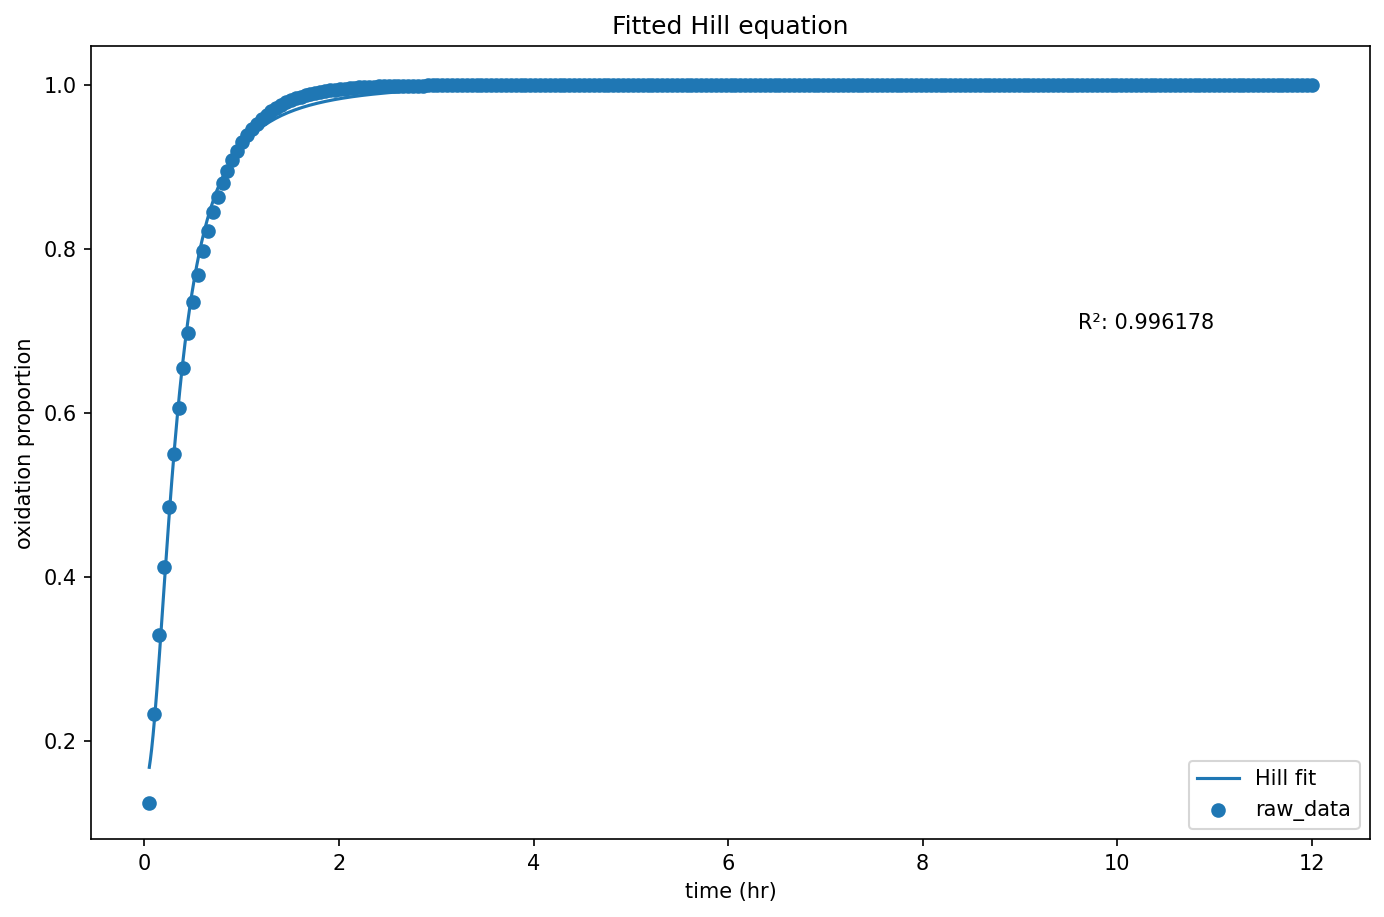

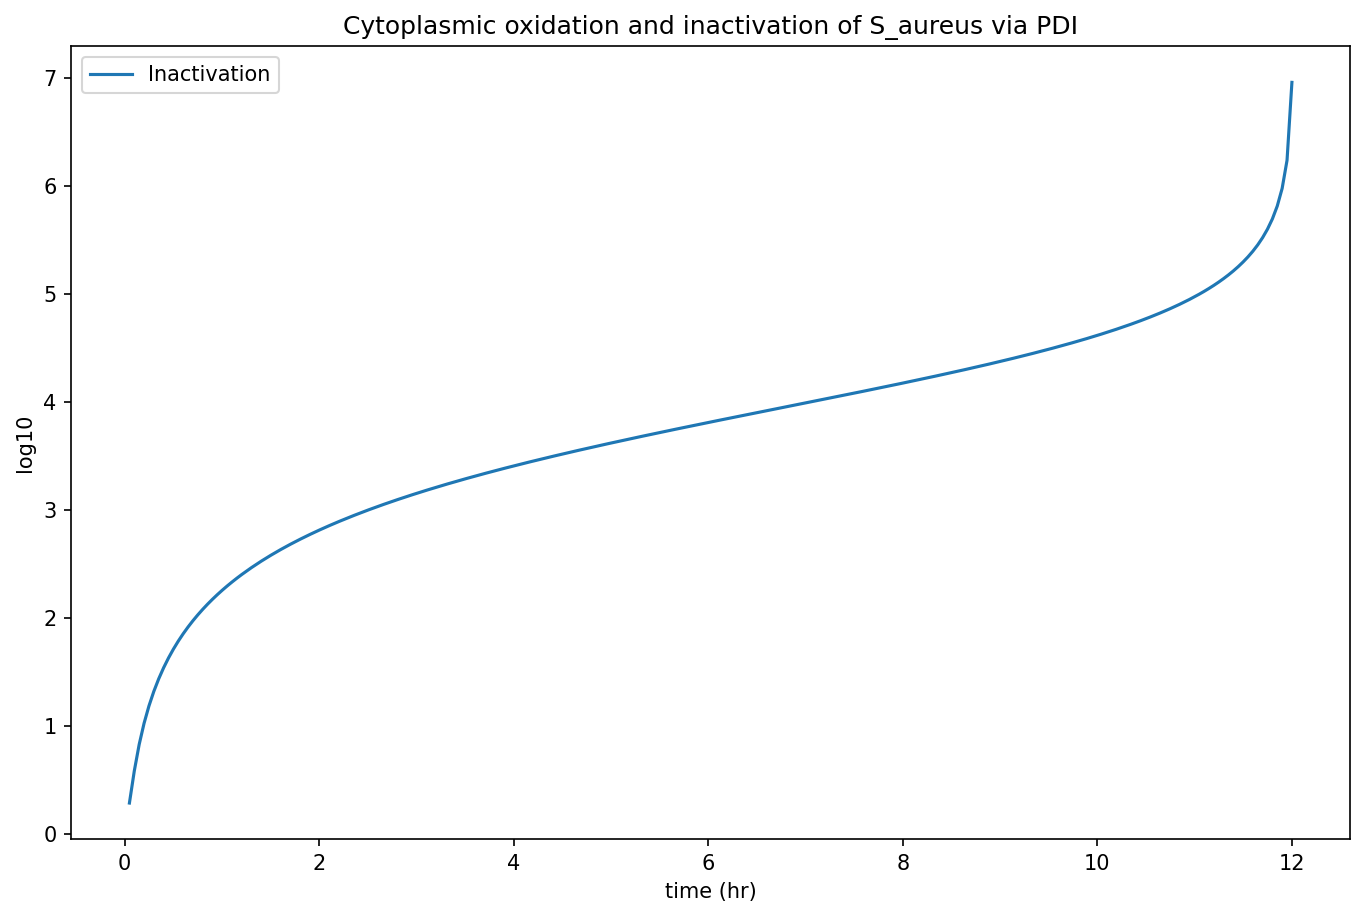

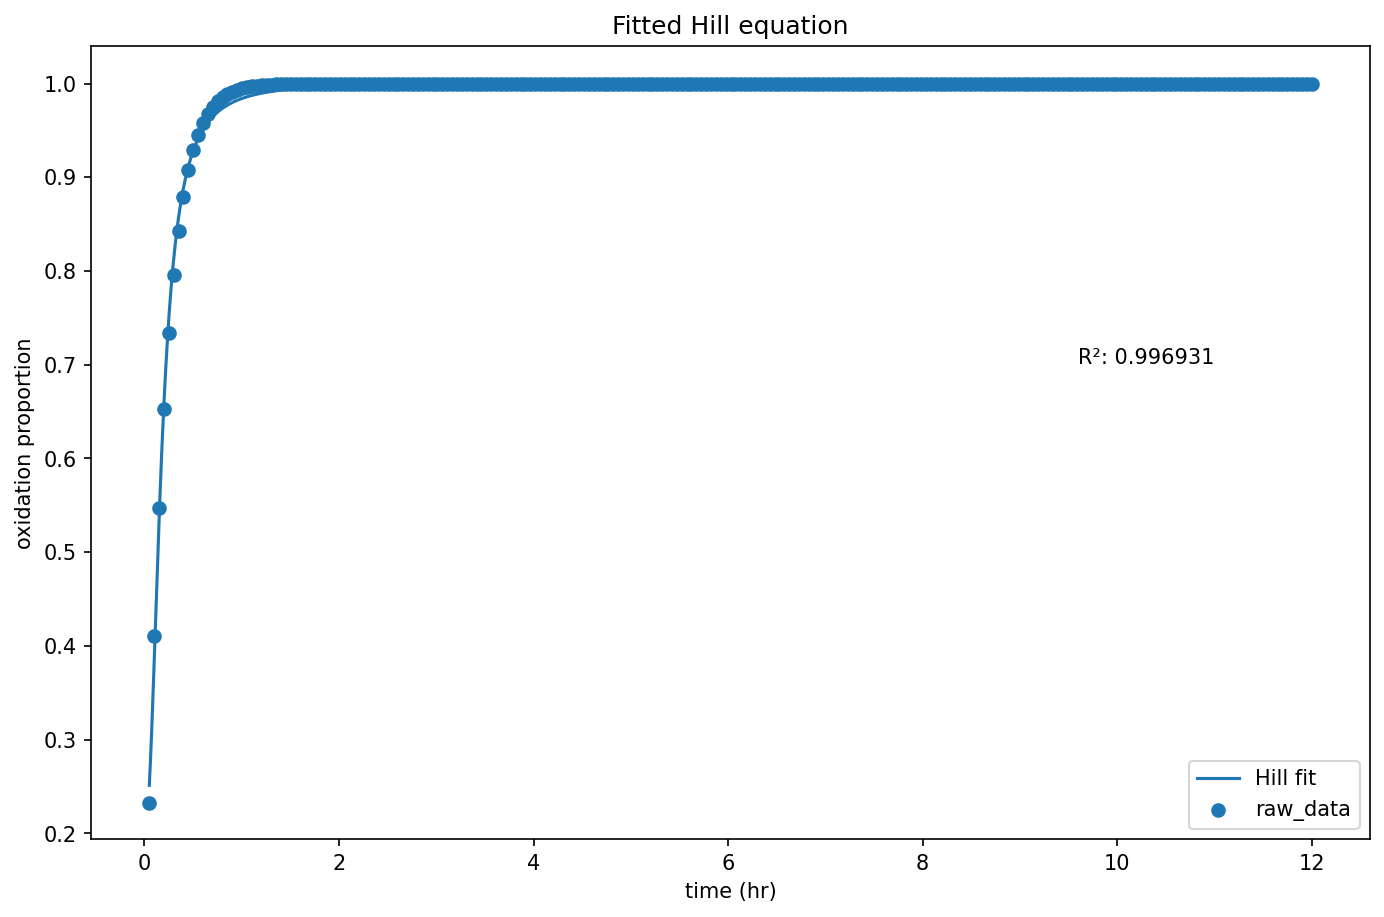

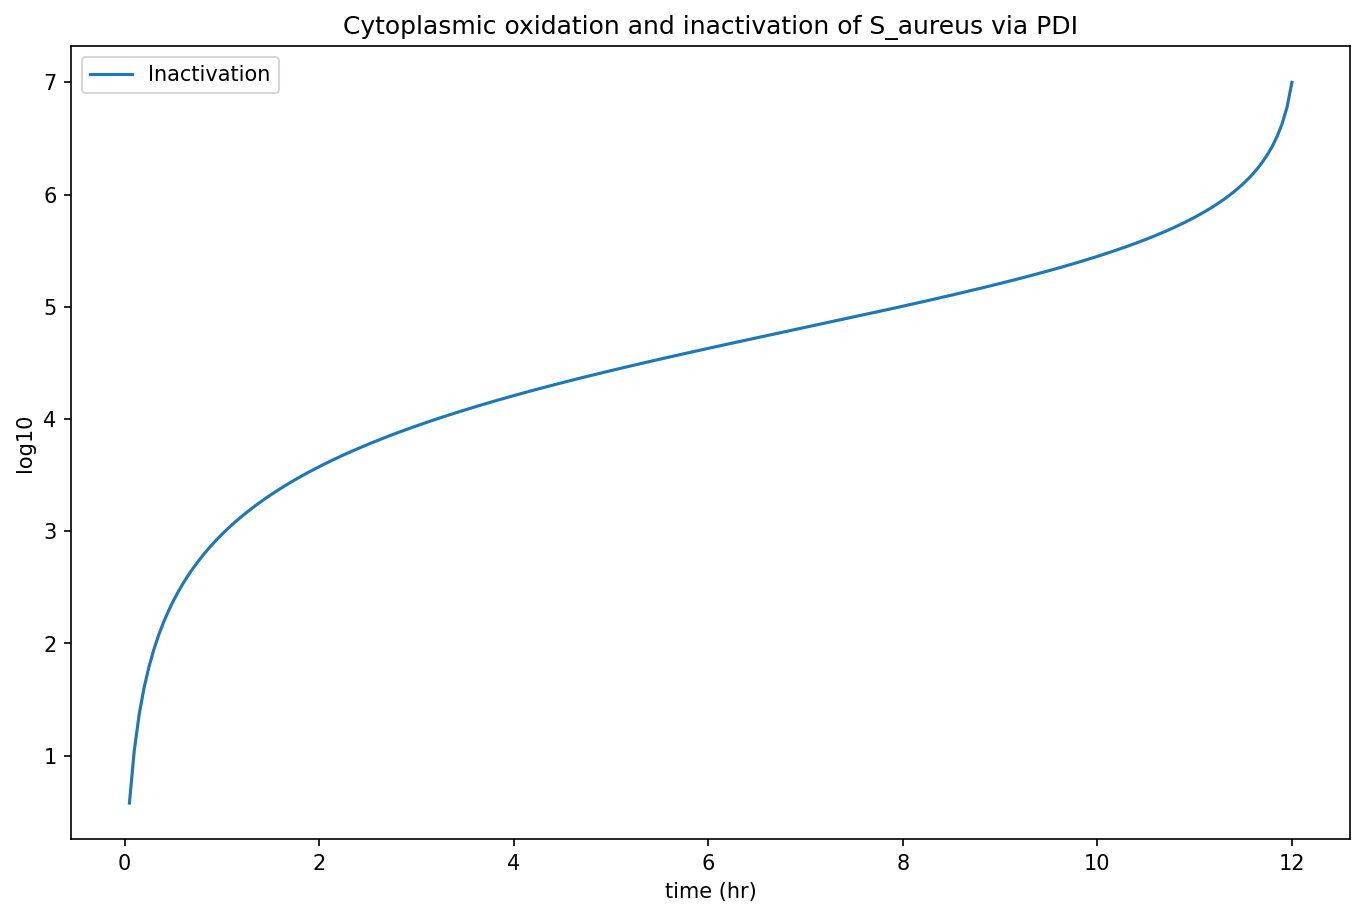

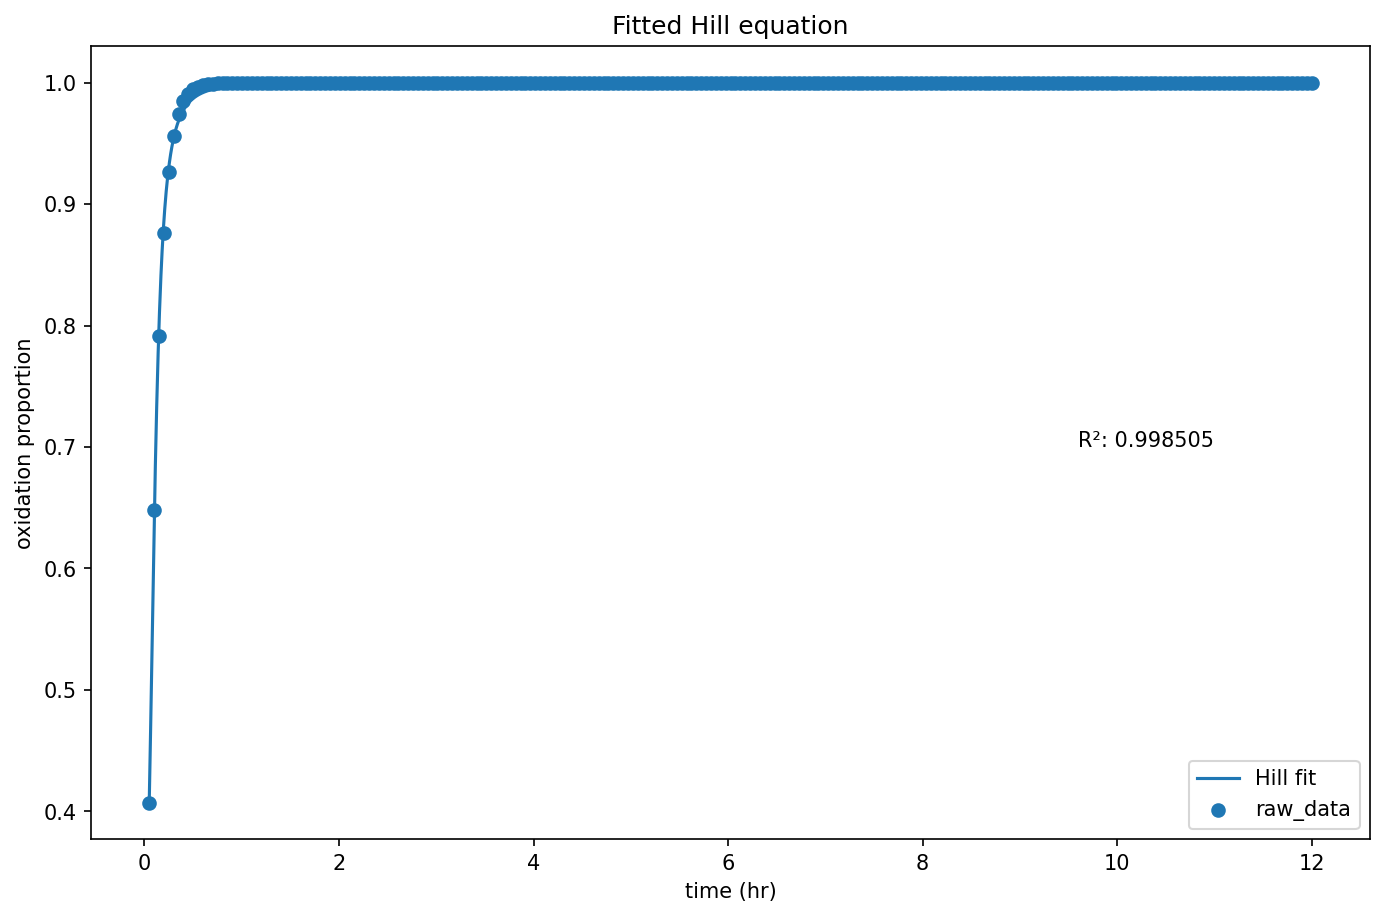

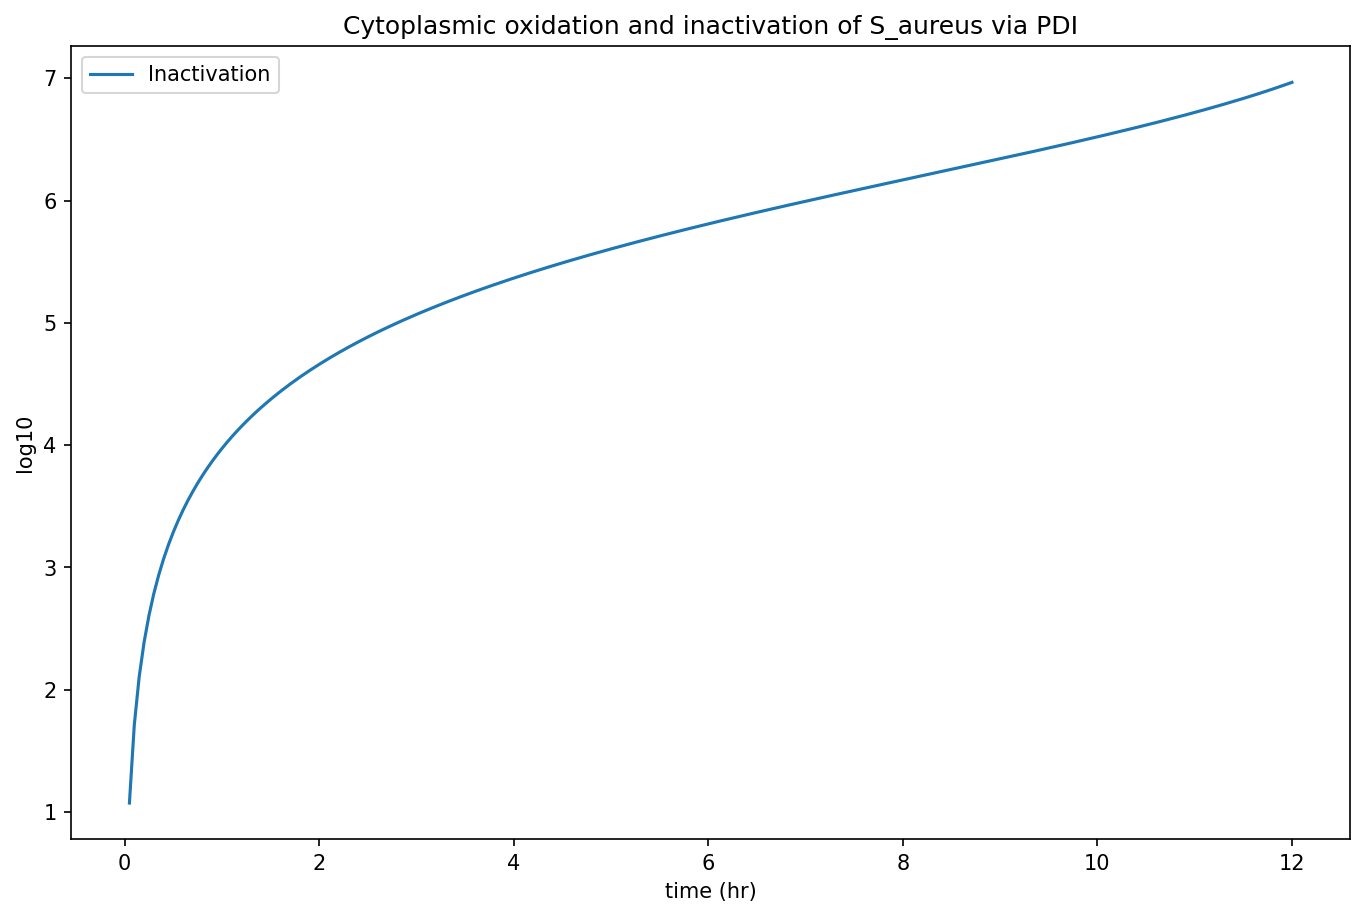

In [3]:
from scipy.constants import micro
from uncertainties import ufloat
%run ../../pdipy/core.py
%matplotlib inline

# define photosensitizer parameters
photosensitizer = {
    'name': '5,10,15,20-tetrakis(1-methylpyridinium-4-yl)porphyrin tetra-iodide',
    'mw': {
        'value':1186.462   # mass with iodides included, sans iodides 678.84,
    },
    'dimensions':{
        'length (A)': total_length,
        'width (A)': total_length,
        'depth (A)': 1.5,
        'shape': 'disc',
    }
}

# define the light parameters
irradiance = 4
light_source = {
    'name': 'OSRAM 2\' 18W/840 lamps',
    "visible_proportion": {
      "value": (700-390)/(700-380),
    }
}

# define general parameters
total_time = 720
bacterial_specie = 'S_aureus'
photosensitizer_molars = [5*micro, 10*micro, 20*micro]

# execute the simulation
for photosensitizer_molar in photosensitizer_molars:
    export_name = f'Beirao_et_al, biofilm, {int(photosensitizer_molar/micro)} uM solution'
    
    pdi = PDIBacterialPkg(total_time, verbose = True, jupyter = True)
    pdi.define_bacterium(bacterial_specie, bacterial_cfu_ml = 1E8, biofilm = True)
    pdi.define_photosensitizer(photosensitizer, photosensitizer_molar)
    pdi.define_light(light_source, irradiance)
    pdi.simulate()
    pdi.export(export_name)
    display(pdi.processed_data)

    # affirm the accuracy of the prediction
    if photosensitizer_molar == 20*micro:
        target_reduction = 1-10**(-6.3)
        value, unit = pdi.data_parsing(target_reduction)    
        print(value, unit)
        actual_value = 6.5
        
    elif photosensitizer_molar == 5*micro:
        target_reduction = 1-10**(-3.6)
        value, unit = pdi.data_parsing(target_reduction)
#         value, unit = pdi.data_parsing(target_time = 6.5)
        print(value, unit)
        actual_value = 6.5
        
    elif photosensitizer_molar == 10*micro:
        target_reduction = 1-10**(-5)
        value, unit = pdi.data_parsing(target_reduction)
#         value, unit = pdi.data_parsing(target_time = 6.5)
        print(value, unit)
        actual_value = 6.5
        
    if value is not None:
        tolerance = actual_value*0.5
        acceptable_range = [actual_value-tolerance, actual_value+tolerance]
        acceptable_range_float = ufloat(actual_value, tolerance)
        if acceptable_range[0] < value < acceptable_range[1]:
            print(f'The prediction of {value} is within the {acceptable_range_float} tolerance of the actual value.')
        else:
            print(f'--> ERROR: The prediction of {value} is not within the {acceptable_range_float} tolerance of the actual value.')
    
    print('\n\n\n\n')